In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

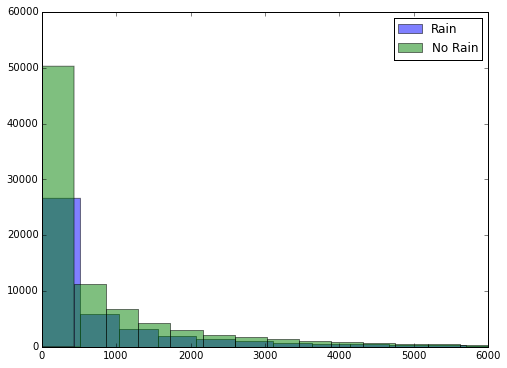

In [55]:
csv_file = "turnstile_data_master_with_weather.csv"
turnstile_weather = pd.read_csv(csv_file)


def entries_histogram(turnstile_weather=turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''

    fig, (pd_hist) = plt.subplots(1,1,figsize = (8,6))
    
    a = np.array(turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain']==1)]) # your code here to plot a historgram for hourly entries when it is raining
    b = np.array(turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain']==0)]) # your code here to plot a historgram for hourly entries when it is not raining
    pd_hist.hist(a, 100, alpha=0.5, label="Rain")
    pd_hist.hist(b, 100, alpha=0.5, label="No Rain")
    pd_hist.set_xlim(0,6000)
    pd_hist.legend()
    
    return pd_hist

entries_histogram()

In [56]:
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_plus_means(turnstile_weather=turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    with_rain_mean = np.mean(turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain']==1)])
    without_rain_mean = np.mean(turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain']==0)])
    U, p = scipy.stats.mannwhitneyu(np.array(turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain']==1)]),np.array(turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain']==0)]))
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader

mann_whitney_plus_means()

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024999912793489721)

In [ ]:
import numpy as np
import pandas
from ggplot import *

"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    m = len(values)
    hypothesis = sum(np.dot(features, theta))
    cost = sum(np.square(hypothesis-values))/(2*m)
    return cost

def hypothesis(features, theta):
    h_x = np.dot(features, theta)
    return h_x



def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        h0 = np.dot(features, theta)
        loss = np.dot((targets - h0), features).sum()
        scndterm = alpha*loss/m
        theta = theta + scndterm
        cost = compute_cost(features,values,theta)        
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    # plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
   """This function is for viewing the plot of your cost history.
   You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

   call in predictions.
   
   If you want to run this locally, you should print the return value
   from this function.
   """
   cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
   return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
      geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )


